In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing

### generating sample data set

In [2]:
genes=['gene'+str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)] # wild type sample 
ko=['ko'+str(i) for i in range(1,6)] # knock out sample

In [3]:
data=pd.DataFrame(columns=[*wt,*ko],index=genes)

In [4]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [5]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  742  682  697  689  660  104   99   91  100   90
gene2  217  190  224  198  183   30   27   19   28   26
gene3  889  858  806  842  886  205  221  205  230  237
gene4  302  278  286  319  270  286  261  276  277  268
gene5  594  630  572  583  610  292  308  279  288  269


In [6]:
data.shape

(100, 10)

In [7]:
scaled_data=preprocessing.scale(data.T) # after centering average=0 and after scaling std=1

###### scale functions expect the samples to be in row instead of columns 

### Sklearn -> variation = (measurements-mean)^2/(the number of measurement)

In [8]:
# creating pca
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [9]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

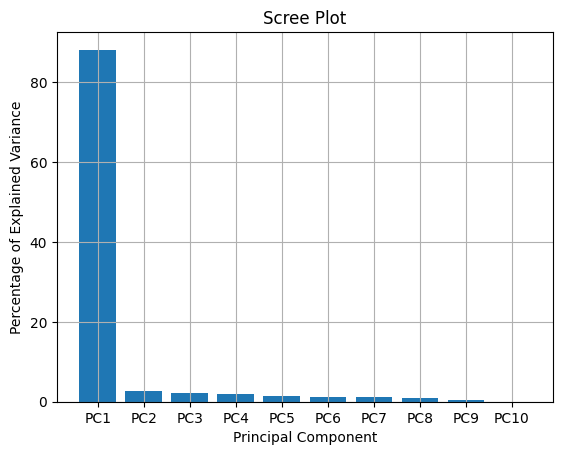

In [10]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

### Almost all the variance is around first Pc and second PC so using 2-D plot is good representaing of original data

In [11]:
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.292098,0.122732,-1.658306,0.666779,-0.759496,1.407329,2.115107,-0.608961,-0.161817,-8.438621e-16
wt2,-9.235148,1.979227,1.335282,-0.392567,-1.589723,-1.214866,0.109251,0.335057,1.028265,-7.526036e-16
wt3,-9.185743,0.501726,-2.405200,0.723111,0.760934,-0.344678,-1.221901,1.697867,-0.235779,-5.333446e-16
wt4,-9.785654,-0.407766,0.436296,-2.997937,1.539336,-0.462586,-0.002172,-0.852653,-0.412608,-4.067784e-16
wt5,-9.413429,-2.169288,2.261062,2.063901,-0.003049,0.614529,-0.997387,-0.526821,-0.210362,5.902817e-16


In [12]:
per_var

array([88.1,  2.7,  2.1,  1.9,  1.4,  1.3,  1.1,  1. ,  0.4,  0. ])

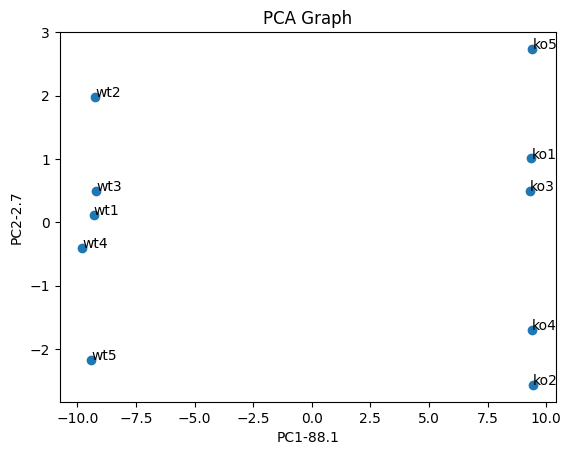

In [13]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(f'PC1-{per_var[0]}')
plt.ylabel(f'PC2-{per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample,(pca_df['PC1'].loc[sample],pca_df['PC2'].loc[sample]))
plt.show()

### wt -> correlated on left side
### ko -> correlated on right side
### distance on x-axis between wt and ko cluster tells that they are different from each other

### loading Scores

In [14]:
loading_scores=pd.Series(pca.components_[0],index=genes)

In [15]:
sorted_loading_scores=loading_scores.abs().sort_values(ascending=True)

In [16]:
top_10_genes=sorted_loading_scores[0:10].index.values

In [17]:
loading_scores[top_10_genes]

gene80   -0.008207
gene85   -0.017631
gene16   -0.017708
gene78    0.036153
gene4    -0.057823
gene68    0.058566
gene59    0.067457
gene26   -0.073154
gene36    0.073762
gene93   -0.076165
dtype: float64